# ***Building RAYA — The Architect of Type 1 Civilization***

 “Driving humanity toward a sustainable and intelligent civilization.”



---

### 🌍 ***Problem Statement: "The Human Sustainability Index (HSI) 2.0 — AI for a Livable Future"***

The next frontier for humanity isn’t just technological progress — it’s **sustainable survival**.

**HSI 2.0** acts as an intelligent sustainability compass — an AI-powered mirror that reflects how livable and future-ready a city truly is. It goes beyond static metrics to **analyze, predict, and simulate** the balance between human development and natural systems.

By integrating multi-dimensional data on **water, energy, climate, pollution, and waste**, HSI 2.0 identifies **emerging risks, regional disparities, and pathways for sustainable growth**.

Through **AI-driven clustering, predictive modeling, and generative insights**, it empowers **governments, communities, and organizations** to design smarter policies, foster resilience, and ensure a **thriving planet for generations ahead.** 🌱✨

---



----

### **What's in Human Sustainability Index (HSI) 2.0 ?**

**Ans:** This dataset offers a realistic and holistic foundation for Human Sustainability Index (HSI) prediction. It has been synthesized by integrating multiple open-source datasets to create a unified, systematized dataset that reflects real-world sustainability conditions across regions.

Instead of using a direct HSI score, we employed **clustering techniques** to determine optimal category groupings for HSI, resulting in five meaningful sustainability classes — **["Moderately Sustainable", "Critical (Unsustainable)", "Highly Sustainable", "Sustainable", "Low Sustainable"]**.

Additionally, we computed the **Urbanization %** and enriched the dataset with extended features such as **Energy Source, Water Consumption, SGD %, AQI, AQI Bucket, Waste Type, Disposal Method, Recycling Rate (%),** and **Cost of Waste Management (₹/Ton)** — all contributing to a more data-driven and actionable sustainability assessment.



In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"../HSI data/HSI_data_2.0.csv")

data.tail()

,State,District,population,population_proper,Location,EnergySource,WaterConsumption,SGD %,AQI,AQI_Bucket,Waste Type,Disposal Method,Recycling Rate (%),Cost of Waste Management (₹/Ton)
29526,Haryana,Gurugram,7904745,6.014234e+06,Rural,Mixed,2.943804e+07,58.3,209,Moderate,Non-Biodegradable,Landfill,87.712836,NaN
29527,Chhattisgarh,Bilaspur,478957,3.353272e+05,Suburban,Mixed,2.653028e+08,90.2,216,Moderate,E-Waste,Landfill,89.984670,NaN
29528,Haryana,Gurugram,2825327,1.767623e+06,Rural,Hydro,1.603487e+08,66.5,66,Severe,Biodegradable,Recycling,89.289829,NaN
29529,Rajasthan,Udaipur,8593998,6.641304e+06,Urban,Thermal,1.522098e+08,47.6,227,Moderate,Biodegradable,Incineration,62.247141,NaN
29530,Telangana,Hyderabad,5691472,3.678529e+06,Urban,Hydro,1.804661e+08,44.4,397,Good,Mixed,Recycling,47.582822,NaN


In [2]:
# Group by State and Location to sum population
state_location = data.groupby(['State', 'Location'])['population'].sum().unstack(fill_value=0)

# Compute Urbanization %
state_location['Urbanization %'] = (state_location['Urban'] / state_location.sum(axis=1)) * 100

# Merge back to main df
data = data.merge(
    state_location['Urbanization %'],
    on='State',
    how='left'
)

data.head()

,State,District,population,population_proper,Location,EnergySource,WaterConsumption,SGD %,AQI,AQI_Bucket,Waste Type,Disposal Method,Recycling Rate (%),Cost of Waste Management (₹/Ton),Urbanization %
0,ANDHRA PRADESH,Anantapur,5690620,4656456.657,Urban,Mixed,2.249152e+08,47.1,377,Good,E-Waste,Landfill,20.060841,3056.0,37.059616
1,ANDHRA PRADESH,Chittoor,4402397,2880483.747,Suburban,Solar,2.120238e+08,82.7,311,Very Poor,Biodegradable,Landfill,82.181303,2778.0,37.059616
2,ANDHRA PRADESH,East Godavari,5960353,5499209.272,Rural,Thermal,2.307633e+08,67.1,135,Very Poor,Mixed,Recycling,70.512784,3390.0,37.059616
3,ANDHRA PRADESH,Guntur,4472323,3596533.313,Urban,Thermal,1.189942e+08,72.9,100,Very Poor,Mixed,Landfill,39.789760,1498.0,37.059616
4,ANDHRA PRADESH,Kadapa,9315873,7518150.908,Suburban,Solar,2.383209e+07,49.6,94,Severe,Non-Biodegradable,Incineration,14.726121,2221.0,37.059616


In [3]:
data.isnull().sum()

State                                   0
District                                0
population                              0
population_proper                       0
Location                                0
EnergySource                            0
WaterConsumption                        0
SGD %                                   0
AQI                                     0
AQI_Bucket                              0
Waste Type                              0
Disposal Method                         0
Recycling Rate (%)                      0
Cost of Waste Management (₹/Ton)    28681
Urbanization %                          0
dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = data[['population',
 'WaterConsumption', 'SGD %', 'AQI',
 'Recycling Rate (%)', 'Cost of Waste Management (₹/Ton)',
 'Urbanization %']]


# -----------------------------
# Scale features — very important for K-Means
# -----------------------------
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

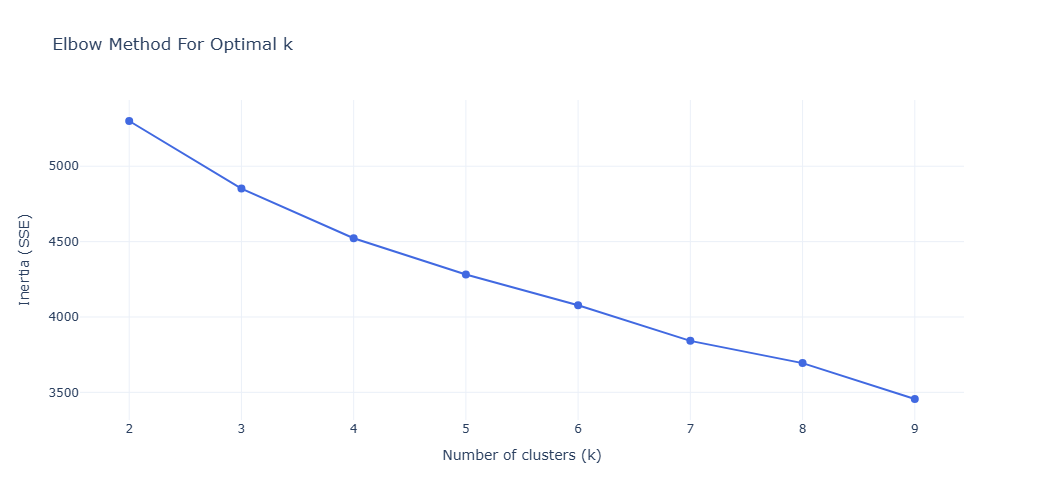

In [6]:
# -----------------------------
# Find optimal k with Elbow Method
# -----------------------------
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)  # Distortion / SSE

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=list(k_range),
        y=inertia,
        mode='lines+markers',
        marker=dict(color='royalblue', size=8),
        line=dict(width=2),
        name='Inertia'
    )
)

fig.update_layout(
    title='Elbow Method For Optimal k',
    xaxis_title='Number of clusters (k)',
    yaxis_title='Inertia (SSE)',
    xaxis=dict(tickmode='linear'),
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

In [7]:
# Suppose you choose k= from the elbow
optimal_k = 5

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data['HSI_Type'] = kmeans_final.fit_predict(features_scaled)

print(data.groupby('HSI_Type')[['population', 'WaterConsumption', 'SGD %', 'AQI', 'Recycling Rate (%)', 'Cost of Waste Management (₹/Ton)', 'Urbanization %']].mean())

            population  WaterConsumption      SGD %         AQI  \
HSI_Type                                                          
0         4.770582e+06      3.895818e+08  62.940909  206.409091   
1         6.005772e+06      3.370353e+08  82.139227  230.375691   
2         3.819072e+06      1.988605e+08  56.527717  192.184783   
3         5.300797e+06      1.409418e+08  61.760667  286.040000   
4         5.125128e+06      1.949373e+08  72.457459  188.088398   

          Recycling Rate (%)  Cost of Waste Management (₹/Ton)  Urbanization %  
HSI_Type                                                                        
0                  38.020594                       3701.980519       37.382861  
1                  67.432657                       2792.801105       33.147308  
2                  70.374111                       2160.532609       35.865891  
3                  45.462613                       3780.193333       29.213886  
4                  28.585000                

In [8]:
cluster_avg = data.groupby("HSI_Type")[['population', 'WaterConsumption', 'SGD %', 'AQI', 'Recycling Rate (%)', 'Cost of Waste Management (₹/Ton)', 'Urbanization %']].mean().sort_values(by='population')
ordered_clusters = cluster_avg.index.tolist()

In [9]:
ordered_clusters

[2, 0, 4, 3, 1]

In [10]:
# Make a mapping
segment_names = ["Moderately Sustainable", "Critical (Unsustainable)", "Highly Sustainable", "Sustainable", "Low Sustainable"]
cluster_to_label = {cluster: segment_names[i] for i, cluster in enumerate(ordered_clusters)}

# Apply mapping
data["HSI_Label"] = data["HSI_Type"].map(cluster_to_label)

print(data[["District","HSI_Type", "HSI_Label"]].head())
print('--' * 25)
print(data[["HSI_Type", "HSI_Label"]].value_counts())

        District  HSI_Type               HSI_Label
0      Anantapur         3             Sustainable
1       Chittoor         1         Low Sustainable
2  East Godavari         2  Moderately Sustainable
3         Guntur         4      Highly Sustainable
4         Kadapa         4      Highly Sustainable
--------------------------------------------------
HSI_Type  HSI_Label               
2         Moderately Sustainable      184
4         Highly Sustainable          181
1         Low Sustainable             181
0         Critical (Unsustainable)    154
3         Sustainable                 150
Name: count, dtype: int64


In [11]:
data['Location'] = data['Location'].map({
    'Urban': 1,
    'Suburban': 2,
    'Rural': 3
})

In [12]:
data['EnergySource'] = data['EnergySource'].map({
    'Hydro': 1,
    'Mixed': 2,
    'Thermal': 3,
    'Solar': 4,
    'Wind': 5
})

In [13]:
data['Waste Type'] = data['Waste Type'].map({
    'E-Waste': 1,
    'Non-Biodegradable': 2,
    'Biodegradable': 3,
    'Mixed': 4

})

In [14]:
data['Disposal Method'] = data['Disposal Method'].map({
    'Incineration': 1,
    'Composting': 2,
    'Landfill': 3,
    'Recycling': 4

})

In [15]:
data.head(8)

,State,District,population,population_proper,Location,EnergySource,WaterConsumption,SGD %,AQI,AQI_Bucket,Waste Type,Disposal Method,Recycling Rate (%),Cost of Waste Management (₹/Ton),Urbanization %,HSI_Type,HSI_Label
0,ANDHRA PRADESH,Anantapur,5690620,4.656457e+06,1,2,2.249152e+08,47.1,377,Good,1,3,20.060841,3056.0,37.059616,3,Sustainable
1,ANDHRA PRADESH,Chittoor,4402397,2.880484e+06,2,4,2.120238e+08,82.7,311,Very Poor,3,3,82.181303,2778.0,37.059616,1,Low Sustainable
2,ANDHRA PRADESH,East Godavari,5960353,5.499209e+06,3,3,2.307633e+08,67.1,135,Very Poor,4,4,70.512784,3390.0,37.059616,2,Moderately Sustainable
3,ANDHRA PRADESH,Guntur,4472323,3.596533e+06,1,3,1.189942e+08,72.9,100,Very Poor,4,3,39.789760,1498.0,37.059616,4,Highly Sustainable
4,ANDHRA PRADESH,Kadapa,9315873,7.518151e+06,2,4,2.383209e+07,49.6,94,Severe,2,1,14.726121,2221.0,37.059616,4,Highly Sustainable
5,ANDHRA PRADESH,Krishna,3744548,2.894272e+06,3,3,4.701348e+08,73.6,382,Good,3,4,36.631581,3195.0,37.059616,0,Critical (Unsustainable)
6,ANDHRA PRADESH,Kurnool,1281696,8.611365e+05,1,4,2.505298e+08,77.3,95,Moderate,2,1,74.664997,3686.0,37.059616,2,Moderately Sustainable
7,ANDHRA PRADESH,Nellore,6054779,5.082444e+06,2,1,3.983206e+08,41.4,122,Severe,2,4,34.713708,1791.0,37.059616,0,Critical (Unsustainable)


In [16]:
data.columns

Index(['State', 'District', 'population', 'population_proper', 'Location',
       'EnergySource', 'WaterConsumption', 'SGD %', 'AQI', 'AQI_Bucket',
       'Waste Type', 'Disposal Method', 'Recycling Rate (%)',
       'Cost of Waste Management (₹/Ton)', 'Urbanization %', 'HSI_Type',
       'HSI_Label'],
      dtype='object')

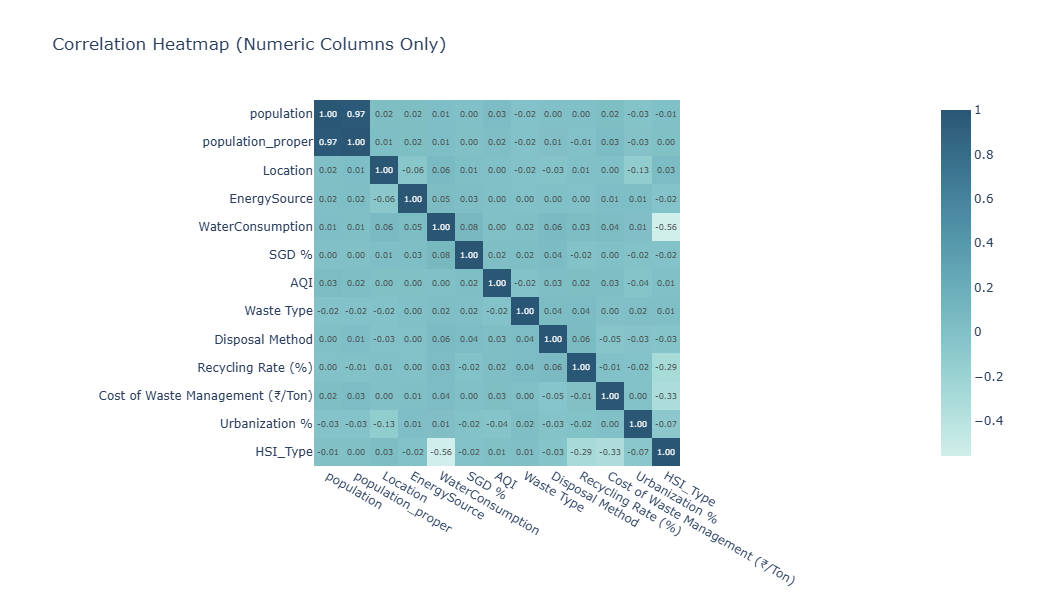

In [17]:
df_numeric = data.select_dtypes(include=['number'])
corr = df_numeric.corr()

import plotly.express as px

fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale='Teal',
    title="Correlation Heatmap (Numeric Columns Only)"
)

fig.update_layout(
    width=850,
    height=600
)

fig.show()


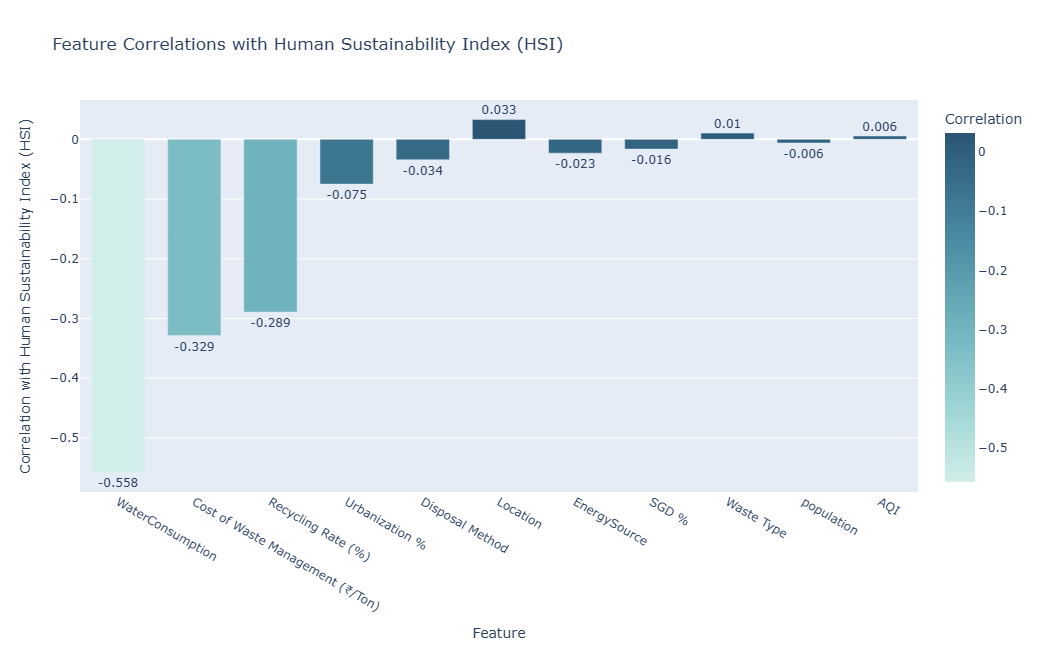

In [18]:
corr_features = [
    'population', 'Location',
       'EnergySource', 'WaterConsumption', 'SGD %', 'AQI',
       'Waste Type', 'Disposal Method', 'Recycling Rate (%)',
       'Cost of Waste Management (₹/Ton)', 'Urbanization %', 'HSI_Type'
]

import plotly.express as px
import plotly.graph_objects as go

# Calculate correlation matrix again
corr_matrix = data[corr_features].corr()

# Select only correlations with target column
target_corr = corr_matrix[['HSI_Type']].drop(index='HSI_Type').reset_index()
target_corr.columns = ['Feature', 'Correlation']
target_corr['AbsCorrelation'] = target_corr['Correlation'].abs()

# Sort by absolute correlation
target_corr = target_corr.sort_values(by='AbsCorrelation', ascending=False)

fig = px.bar(
    target_corr,
    x='Feature',
    y='Correlation',
    color='Correlation',
    title='Feature Correlations with Human Sustainability Index (HSI)',
    color_continuous_scale='Teal',
    text=target_corr['Correlation'].round(3)
)

fig.update_layout(
    width=900,
    height=650,
    xaxis_title='Feature',
    yaxis_title='Correlation with Human Sustainability Index (HSI)',
    bargap=0.3
)

fig.update_traces(
    textposition='outside'
)

fig.show()


In [19]:
from sklearn.preprocessing import LabelEncoder

le_state = LabelEncoder()
le_city = LabelEncoder()

data['State_encoded'] = le_state.fit_transform(data['State'])
data['District_encoded'] = le_city.fit_transform(data['District'])


In [20]:
data.drop(['State', 'District'], axis=1, inplace=True)


In [21]:
from sklearn.model_selection import train_test_split

X = data[['State_encoded', 'District_encoded','population', 'Location',
       'EnergySource', 'WaterConsumption', 'SGD %', 'AQI',
       'Waste Type', 'Disposal Method', 'Recycling Rate (%)',
       'Cost of Waste Management (₹/Ton)', 'Urbanization %']]

y = data['HSI_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


----------------------------------------------------------------
✅ XGBoost Classifier Accuracy: 0.91
----------------------------------------------------------------


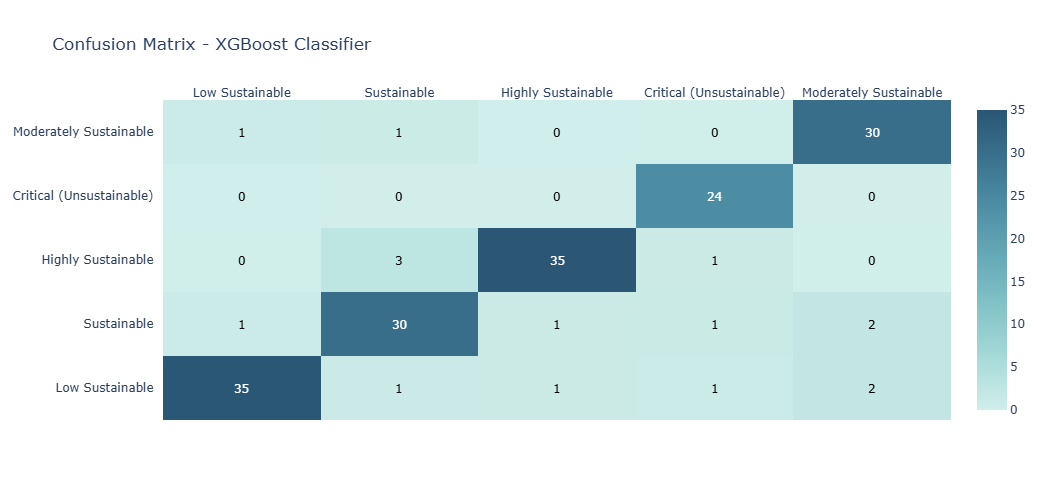

In [22]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.figure_factory as ff

# ✅ Train XGBoost model (no SMOTE)
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train)

# ✅ Predictions
y_pred = xgb_model.predict(X_test)

# ✅ Accuracy
print('----' * 16)
print(f"✅ XGBoost Classifier Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print('----' * 16)

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['Low Sustainable', 'Sustainable', 'Highly Sustainable', 'Critical (Unsustainable)', 'Moderately Sustainable']

z_text = [[str(y) for y in x] for x in cm]

# ✅ Plot confusion matrix using Plotly
fig = ff.create_annotated_heatmap(
    z=cm,
    x=labels,
    y=labels,
    annotation_text=z_text,
    colorscale='teal',
    showscale=True
)

fig.update_layout(
    title_text='Confusion Matrix - XGBoost Classifier',
    width=700,
    height=500
)

fig['data'][0]['showscale'] = True
fig.show()


In [23]:
X_test['State_encoded'] = le_state.inverse_transform(X_test['State_encoded'])
X_test['District_encoded'] = le_city.inverse_transform(X_test['District_encoded'])


In [24]:
X_test['Predicted_HSI'] = y_pred

In [25]:
# HSI mapping
HSI_map = {
    2: 'Moderately Sustainable',
    0: 'Critical (Unsustainable)',
    4: 'Highly Sustainable',
    3: 'Sustainable',
    1: 'Low Sustainable'
}

Disposal_Method_map = {
    1: 'Incineration',
    2: 'Composting',
    3: 'Landfill',
    4: 'Recycling'

}

Waste_Type_map = {
    1: 'E-Waste',
    2: 'Non-Biodegradable',
    3: 'Biodegradable',
    4: 'Mixed'
}

Energy_Source_map = {
    1: 'Hydro',
    2: 'Mixed',
    3: 'Thermal',
    4: 'Solar',
    5: 'Wind'

}

Location_map = {
    1: 'Urban',
    2: 'Suburban',
    3: 'Rural'
}

X_test['Predicted_HSI'] = X_test['Predicted_HSI'].map(HSI_map)
X_test['Disposal Method'] = X_test['Disposal Method'].map(Disposal_Method_map)
X_test['Waste Type'] = X_test['Waste Type'].map(Waste_Type_map)
X_test['EnergySource'] = X_test['EnergySource'].map(Energy_Source_map)
X_test['Location'] = X_test['Location'].map(Location_map)

#### **Final Test Data** : Ready for semi-deployment

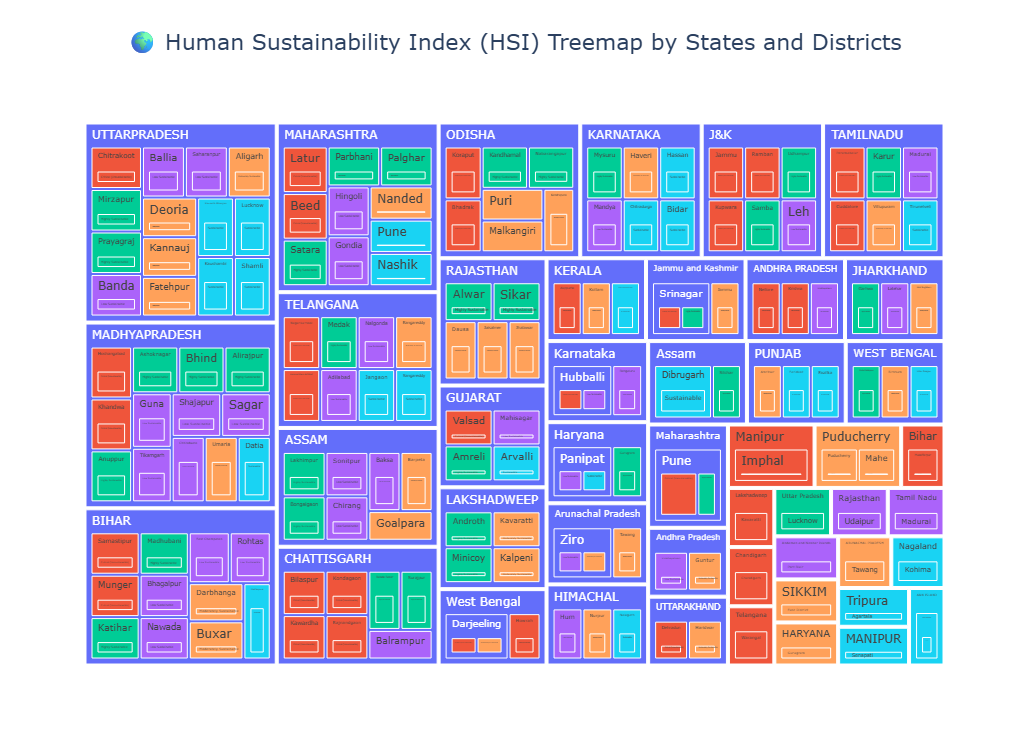

In [26]:
import plotly.express as px
import pandas as pd

# --------------------------------------------
# 1️⃣ Group data for visualization
# --------------------------------------------
df_treemap = (
    X_test.groupby(['State_encoded', 'District_encoded', 'Predicted_HSI'])
    .size()
    .reset_index(name='Count')
)

# Optional: make HSI labels human-readable
df_treemap['HSI_Label'] = df_treemap['Predicted_HSI'].replace({
    0: 'Critical (Unsustainable)',
    1: 'Low Sustainable',
    2: 'Moderately Sustainable',
    3: 'Sustainable',
    4: 'Highly Sustainable'
})

# --------------------------------------------
# 2️⃣ Build Treemap (Squarify)
# --------------------------------------------
fig = px.treemap(
    df_treemap,
    path=['State_encoded', 'District_encoded', 'HSI_Label'],  # hierarchy
    values='Count',
    color='Predicted_HSI',  # color by sustainability level
    color_continuous_scale='Tealgrn',
    title="🌍 Human Sustainability Index (HSI) Treemap by States and Districts"
)

# --------------------------------------------
# 3️⃣ Styling
# --------------------------------------------
fig.update_layout(
    width=950,
    height=750,
    title_x=0.5,
    title_font=dict(size=22),
    font=dict(size=12)
)

fig.show()


In [27]:
X_test.columns

Index(['State_encoded', 'District_encoded', 'population', 'Location',
       'EnergySource', 'WaterConsumption', 'SGD %', 'AQI', 'Waste Type',
       'Disposal Method', 'Recycling Rate (%)',
       'Cost of Waste Management (₹/Ton)', 'Urbanization %', 'Predicted_HSI'],
      dtype='object')

#### **Renaming Columns**

In [28]:
X_test.columns = [
    'State', 'District', 'Population', 'Location',
    'Energy Source', 'Water Consumption', 'SGD %', 'AQI', 'Waste Type',
       'Disposal Method', 'Recycling Rate (%)',
       'Cost of Waste Management (₹/Ton)', 'Urbanization %', 'Predicted HSI'
]

### *Semi-Deployment*

In [29]:
import pandas as pd
from ipywidgets import interact, widgets, VBox


# ------------------------------------------
# 🔹 Dropdown widgets
# ------------------------------------------
state_dropdown = widgets.Dropdown(
    options=sorted(X_test['State'].unique().tolist()),
    description='Select State:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

district_dropdown = widgets.Dropdown(
    options=[],
    description='Select District:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output = widgets.Output()

# ------------------------------------------
# 🔁 Update districts dynamically
# ------------------------------------------
def update_districts(*args):
    selected_state = state_dropdown.value
    filtered_districts = X_test[X_test['State'] == selected_state]['District'].unique().tolist()
    district_dropdown.options = sorted(filtered_districts)
    if filtered_districts:
        district_dropdown.value = filtered_districts[0]  # Default to first city
        show_district_info(None)  # ✅ Show results immediately after state change

state_dropdown.observe(update_districts, 'value')

# ------------------------------------------
# 📊 Display selected city data
# ------------------------------------------
def show_district_info(change):
    with output:
        output.clear_output()
        selected_state = state_dropdown.value
        selected_district = district_dropdown.value

        row = X_test[(X_test['State'] == selected_state) & (X_test['District'] == selected_district)]
        if row.empty:
            print("No data found for this district.")
            return

        row = row.iloc[0]
        print(f"🏙️ District: {row['District']}, State: {row['State']}\n")

        print(f"👥 Population: {row['Population']:,}")
        print(f"📍 Location Type: {row['Location']}")
        print(f"⚡ Energy Source: {row['Energy Source']}")
        print(f"💧 Water Consumption: {row['Water Consumption']} liters/day (or unit in dataset)")
        print(f"🎯 SGD % Achievement: {row['SGD %']}%")
        print(f"🌫️ Air Quality Index (AQI): {row['AQI']}")
        print(f"🗑️ Waste Type: {row['Waste Type']}")
        print(f"🏗️ Disposal Method: {row['Disposal Method']}")
        print(f"♻️ Recycling Rate: {row['Recycling Rate (%)']}%")
        print(f"💰 Waste Management Cost: ₹{row['Cost of Waste Management (₹/Ton)']:,} per ton")
        print(f"🏙️ Urbanization %: {row['Urbanization %']}%\n")

        print(f"🌍 Predicted HSI Category: {row['Predicted HSI']}")


district_dropdown.observe(show_district_info, 'value')

# ------------------------------------------
# 🚀 Initialize and display
# ------------------------------------------
update_districts()  # ✅ Run once to initialize first state + city data
display(VBox([state_dropdown, district_dropdown, output]))



---

### 🌍 **Future Work: Towards Intelligent Sustainability for Human Life**


Future work will expand **feature diversity** (if requires)

At the final stage/upcoming stage, an **LLM-powered intelligence layer** will transform complex data into **human-readable insights and localized recommendations**, helping **states and cities** enhance livability, align human progress with nature, and take smarter steps toward a **truly sustainable civilization**. ✨



---

